In [13]:
import pandas as pd
import numpy as np

In [2]:
from scipy import stats

In [5]:
stats.norm.cdf(680, loc = 711, scale = 29)

0.14254260383881612

In [6]:
stats.norm.cdf(740, loc = 711, scale = 29)

0.8413447460685429

In [7]:
stats.norm.cdf(697, loc = 711, scale = 29)

0.31463356742704107

In [8]:
0.8413-0.3146

0.5267000000000001

In [10]:
beml_df = pd.read_csv('/Users/swarneil99/Desktop/BEML.csv')
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [11]:
glaxo_df = pd.read_csv('/Users/swarneil99/Desktop/GLAXO.csv')

In [12]:
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [15]:
beml_df1 = beml_df[['Date', 'Close']]
glaxo_df1 = glaxo_df[['Date', 'Close']]

In [16]:
beml_df1

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [18]:
glaxo_df = glaxo_df1.set_index(pd.DatetimeIndex(glaxo_df1['Date']))
beml_df = beml_df1.set_index(pd.DatetimeIndex(beml_df1['Date']))

In [20]:
glaxo_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


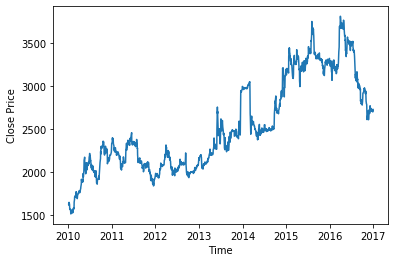

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

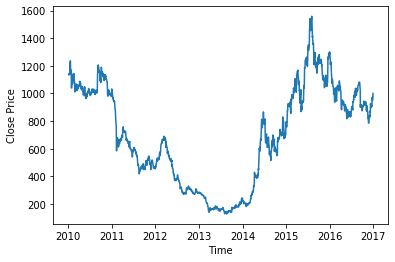

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

In [22]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)


In [23]:
# Drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

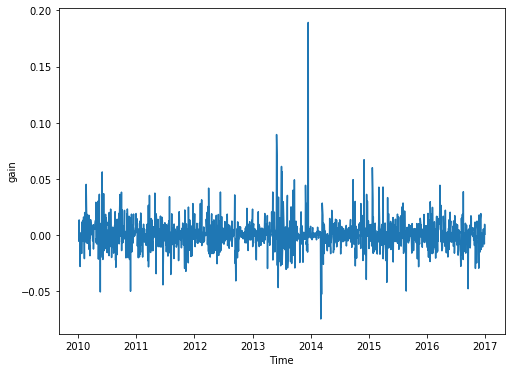

In [24]:
# Plotting the gains

plt.figure(figsize = (8,6))
plt.plot(glaxo_df.index, glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

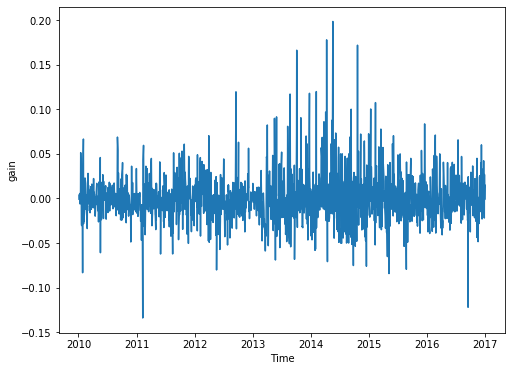

In [26]:
plt.figure(figsize = (8,6))
plt.plot(beml_df.index, beml_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

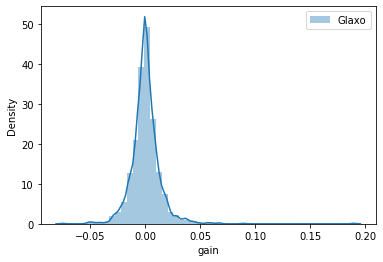

In [27]:
sns.distplot(glaxo_df.gain, label = 'Glaxo')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend();

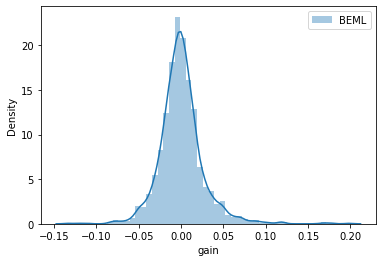

In [28]:
sns.distplot(beml_df.gain, label = 'BEML')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend();

In [29]:
print('Mean', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation', round(glaxo_df.gain.std(),4))

Mean 0.0004
Standard Deviation 0.0134


In [30]:
print('Mean', round(beml_df.gain.mean(), 4))
print('Standard Deviation', round(beml_df.gain.std(),4))

Mean 0.0003
Standard Deviation 0.0264


In [31]:
from scipy import stats
# Probability of making 2% loss or higher in Glaxo

stats.norm.cdf(-0.02,
              loc = glaxo_df.gain.mean(),
              scale = glaxo_df.gain.std())

0.06352488667177397

In [33]:
# Probability of making 2% gain or higher in Glaxo

1 - stats.norm.cdf(0.02,
              loc = glaxo_df.gain.mean(),
              scale = glaxo_df.gain.std())

0.07104511457618568

In [34]:
# Probability of making 2% loss or higher in Beml

stats.norm.cdf(-0.02,
              loc = beml_df.gain.mean(),
              scale = beml_df.gain.std())

0.22155987503755292

In [35]:
# Probability of making 2% gain or higher in Beml

1 - stats.norm.cdf(0.02,
              loc = beml_df.gain.mean(),
              scale = beml_df.gain.std())

0.22769829484075343

In [37]:
stats.norm.ppf(0.95)

1.6448536269514722

In [38]:
1990 - (1.645*211.29)

1642.42795

In [39]:
1990 + (1.645*211.29)

2337.5720499999998

In [40]:
1990 - (2.576*211.29)

1445.71696

In [41]:
1990 + (2.576*211.29)

2534.2830400000003

In [42]:
stats.t.ppf(0.975, df = 139)

1.977177724476122

In [46]:
import math
import numpy as np

In [47]:
2833/np.sqrt(140)

239.43220036458874

In [48]:
1990 - (1.98*239.43)

1515.9286

In [49]:
stats.t.ppf(0.995, df = 139)

2.611661966001053

In [61]:
# 99
1990 - (2.61*239.43)

1365.0877

In [62]:
1990 + (2.61*239.43)

2614.9123

In [52]:
#90 
stats.t.ppf(0.95, df = 139)

1.6558898677725957

In [53]:
1990 - (1.65*239.43)

1594.9405

In [54]:
1990 + (1.65*239.43)

2385.0595

In [63]:
# 80
stats.t.ppf(0.9, df = 139)

1.2876717475181299

In [56]:
1990 - (0.88*239.43)

1779.3016

In [57]:
1990 + (0.88*239.43)

2200.6984

In [58]:
# 85
stats.t.ppf(0.925, df = 139)

1.447530695200718

In [59]:
1990 - (1.44*239.43)

1645.2208

In [60]:
1990 + (1.44*239.43)

2334.7792

In [64]:
glaxo_df.head()

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312


In [65]:
glaxo_df_ci = stats.norm.interval(0.95,
                                 loc = glaxo_df.gain.mean(),
                                 scale = glaxo_df.gain.std())
print('95 % confidence interval is ', np.round(glaxo_df_ci, 4))

95 % confidence interval is  [-0.0258  0.0266]


In [66]:
beml_df_ci = stats.norm.interval(0.95,
                                 loc = beml_df.gain.mean(),
                                 scale = beml_df.gain.std())
print('95 % confidence interval is ', np.round(beml_df_ci, 4))

95 % confidence interval is  [-0.0515  0.0521]


In [67]:
glaxo_df_ci = stats.norm.interval(0.99,
                                 loc = glaxo_df.gain.mean(),
                                 scale = glaxo_df.gain.std())
print('99 % confidence interval is ', np.round(glaxo_df_ci, 4))

99 % confidence interval is  [-0.034   0.0348]


In [70]:
beml_df_ci = stats.norm.interval(0.99,
                                 loc = beml_df.gain.mean(),
                                 scale = beml_df.gain.std())
print('99 % confidence interval is ', np.round(beml_df_ci, 4))

99 % confidence interval is  [-0.0678  0.0684]


In [71]:
glaxo_df_ci = stats.norm.interval(0.80,
                                 loc = glaxo_df.gain.mean(),
                                 scale = glaxo_df.gain.std())
print('80 % confidence interval is ', np.round(glaxo_df_ci, 4))

80 % confidence interval is  [-0.0167  0.0175]


In [72]:
beml_df_ci = stats.norm.interval(0.80,
                                 loc = beml_df.gain.mean(),
                                 scale = beml_df.gain.std())
print('80 % confidence interval is ', np.round(beml_df_ci, 4))

80 % confidence interval is  [-0.0336  0.0341]


In [73]:
glaxo_df_ci = stats.norm.interval(0.85,
                                 loc = glaxo_df.gain.mean(),
                                 scale = glaxo_df.gain.std())
print('85 % confidence interval is ', np.round(glaxo_df_ci, 4))

85 % confidence interval is  [-0.0188  0.0196]


In [74]:
beml_df_ci = stats.norm.interval(0.85,
                                 loc = beml_df.gain.mean(),
                                 scale = beml_df.gain.std())
print('85 % confidence interval is ', np.round(beml_df_ci, 4))

85 % confidence interval is  [-0.0378  0.0383]


In [75]:
stats.t.cdf(2.23, df = 79)

0.9857070911974259

In [79]:
stats.t.cdf(0.95, df = 79)

0.827495218957933